In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Reading Dataset

In [5]:
df = pd.read_csv('adult.data')

In [6]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Changing Columns Names According to us

In [7]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital_status', 'occupation', 'relationship',
              'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 
df.columns = col_labels 

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.shape

(32560, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Converting Categorical Variables into the Numerical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
cols = ['workclass','education','marital_status','occupation','relationship','race','sex','native-country','income']

In [14]:
for col in cols:
    df[col]=le.fit_transform(df[col])

In [15]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


## Data Visualization

C:\Users\HOTSHOT\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HOTSHOT\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


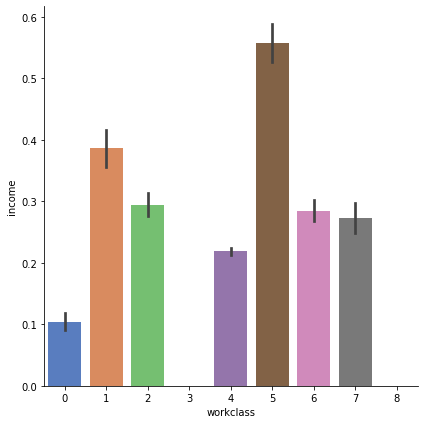

In [16]:
sns.factorplot(x="workclass", y="income", data=df, kind="bar", size = 6, palette = "muted")

<AxesSubplot:>

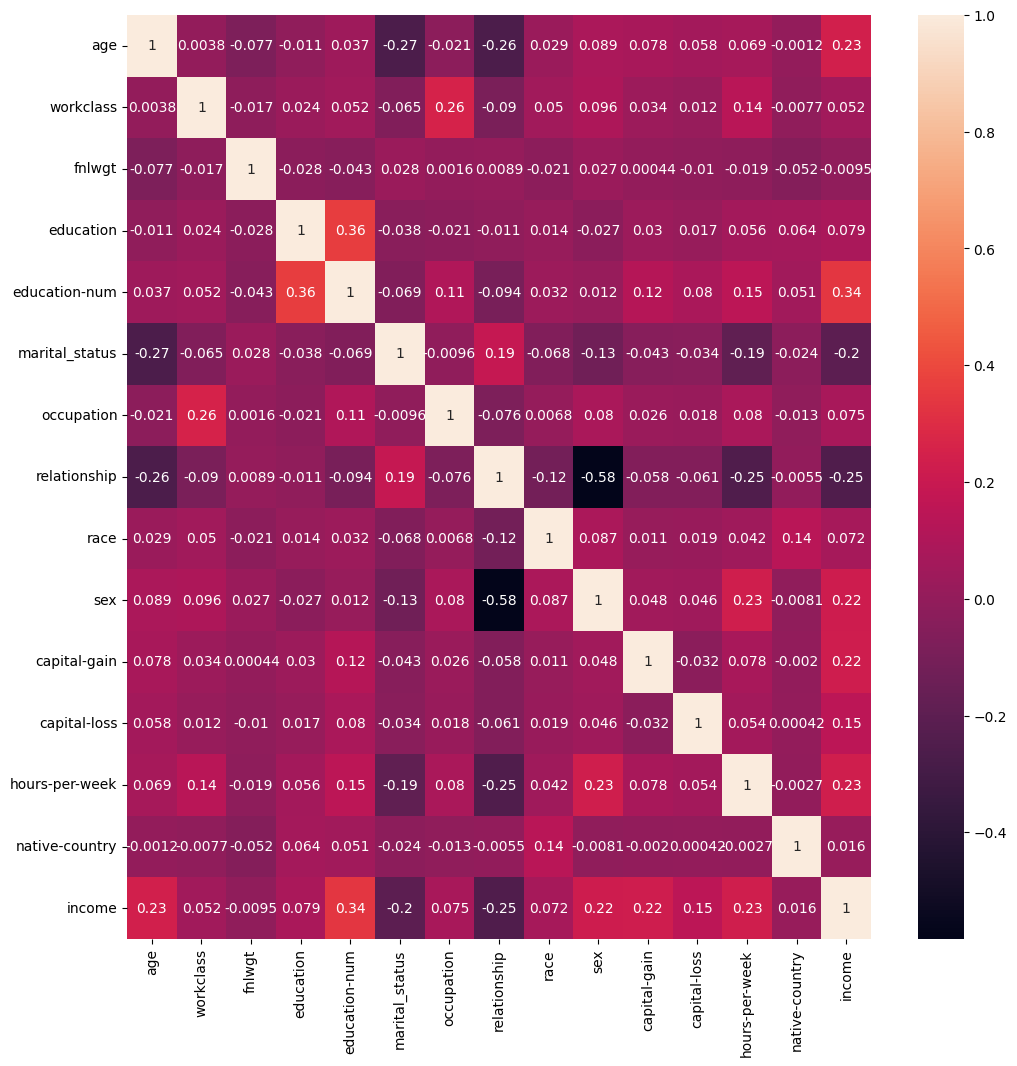

In [17]:
ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='race', ylabel='count'>

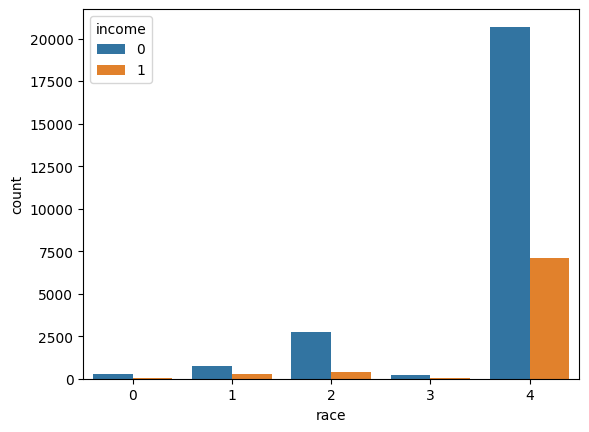

In [18]:
sns.countplot(x ='race', hue = "income", data = df)

<AxesSubplot:xlabel='education-num', ylabel='count'>

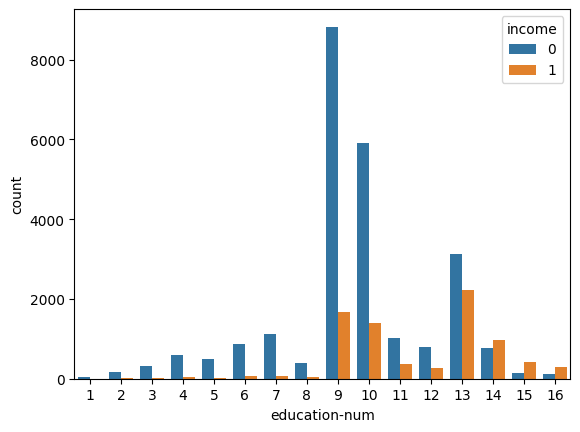

In [19]:
sns.countplot(x ='education-num', hue = "income", data = df)

## Model Building

In [20]:
x = df.drop(["income"], axis=1)
y = df["income"]

In [21]:
from sklearn.model_selection import train_test_split

## Spliting the Dataset in Train and Test

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state=3)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score

## Using Different Classification Models

In [24]:
models = []
names = ["Random Forest Tranining Accuracy","Neural Network Tranining Accuracy","GaussianNB Tranining Accuracy",
         "DecisionTreeClassifier Tranining Accuracy","XGB Tranining Accuracy","KNN Tranining Accuracy"]
names2 = ["Random Forest Testing Accuracy","Neural Network Testing Accuracy","GaussianNB Testing Accuracy",
          "DecisionTreeClassifier Testing Accuracy","XGB Testing Accuracy","KNN Testing Accuracy"]
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier(max_iter=500)))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((xgb.XGBClassifier()))
models.append((KNeighborsClassifier()))

In [25]:
kfold = model_selection.KFold(n_splits=5)

In [26]:
for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],x_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(x_train,y_train)
    training_acc = models[i].score(x_train,y_train)
    prediction = models[i].predict(x_test)
    acc_score_test = accuracy_score(y_test,prediction)     
    print ('*'*40)
    print ('{0}: {1}'.format(names[i],training_acc))
    print ('{0}: {1}'.format(names2[i],acc_score_test))

****************************************
Random Forest Tranining Accuracy: 0.9998771498771499
Random Forest Testing Accuracy: 0.8544226044226044
****************************************
Neural Network Tranining Accuracy: 0.7934479934479934
Neural Network Testing Accuracy: 0.7907862407862408
****************************************
GaussianNB Tranining Accuracy: 0.7968877968877969
GaussianNB Testing Accuracy: 0.7925061425061425
****************************************
DecisionTreeClassifier Tranining Accuracy: 0.9999590499590499
DecisionTreeClassifier Testing Accuracy: 0.8101965601965602
****************************************
XGB Tranining Accuracy: 0.9115069615069615
XGB Testing Accuracy: 0.8707616707616708
****************************************
KNN Tranining Accuracy: 0.8337018837018837
KNN Testing Accuracy: 0.7787469287469287


In [27]:
from sklearn.model_selection import GridSearchCV

## Using GridSearchCV It is a Technique to Search Through the Best Parameter Values

In [28]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
model = xgb.XGBClassifier()
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=10)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
             scoring='neg_log_loss')

In [29]:
top_param=grid_search.best_estimator_

In [30]:
best_model=xgb.XGBClassifier(learning_rate=top_param.learning_rate,booster=top_param.booster,
                             gamma=top_param.gamma,n_estimators=top_param.n_estimators)

## Testing of  XGB Classification Model (as it gave best result above)

In [31]:
best_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## Prediction of the Model

In [32]:
pred = best_model.predict(x_test)

In [33]:
x_test[:10]

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
15728,29,4,122112,9,13,2,12,5,4,0,0,0,50,39
18429,34,5,174215,12,14,4,4,1,4,0,4787,0,45,10
14235,39,5,34180,8,11,2,5,0,4,1,0,0,60,39
5621,36,4,749105,11,9,0,8,4,4,0,0,0,36,39
21149,40,4,222756,15,10,2,7,0,4,1,0,0,40,39
7399,49,4,84013,11,9,0,8,4,4,0,0,0,35,39
7959,26,4,274724,15,10,4,8,2,4,1,0,0,40,27
11047,45,4,190482,11,9,0,7,4,4,1,0,0,40,39
31687,34,5,343789,9,13,2,4,0,4,1,7688,0,55,39
14236,46,2,367251,15,10,2,3,0,2,1,0,0,40,39


In [34]:
pred[:10]

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [35]:
y_test[:10]

15728    0
18429    1
14235    1
5621     0
21149    1
7399     0
7959     0
11047    0
31687    1
14236    1
Name: income, dtype: int32

In [36]:
print("Tranining Accuracy:", best_model.score(x_train,y_train))
print("Testing Accuracy:", best_model.score(x_test,y_test))

Tranining Accuracy: 0.8974610974610975
Testing Accuracy: 0.8730958230958231


## Knowing the Features that are Important in Dataset

In [37]:
best_model.feature_importances_

array([0.0332682 , 0.01750324, 0.01160906, 0.01097129, 0.13270573,
       0.11636817, 0.03069121, 0.38570875, 0.01350849, 0.03042022,
       0.11782281, 0.05478628, 0.02973513, 0.01490148], dtype=float32)

# By looking above values we can say that education-num, marital_status, relationship, capital-gain are the features that are important.

In [38]:
df

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [39]:
df2 = df.drop(["age","workclass", "fnlwgt", "education", "occupation", "race", "sex", "capital-loss", "hours-per-week", "native-country"], axis=1)

In [40]:
df2

,education-num,marital_status,relationship,capital-gain,income
0,13,2,0,0,0
1,9,0,1,0,0
2,7,2,0,0,0
3,13,2,5,0,0
4,14,2,5,0,0
...,...,...,...,...,...
32555,12,2,5,0,0
32556,9,2,0,0,1
32557,9,6,4,0,0
32558,9,4,3,0,0


In [41]:
x1 = df2.drop(["income"], axis=1)
y1 = df2["income"]

In [42]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size= 0.25,random_state=3)

In [43]:
model1 = xgb.XGBClassifier()

In [44]:
model1.fit(x1_train,y1_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
y1_pred = model1.predict(x1_test)

In [46]:
x1_test[:5]

,education-num,marital_status,relationship,capital-gain
15728,13,2,5,0
18429,14,4,1,4787
14235,11,2,0,0
5621,9,0,4,0
21149,10,2,0,0


In [47]:
y1_pred[:5]

array([1, 1, 0, 0, 0])

In [48]:
y1_test[:5]

15728    0
18429    1
14235    1
5621     0
21149    1
Name: income, dtype: int32

In [49]:
print("Tranining Accuracy:", model1.score(x1_train,y1_train))
print("Testing Accuracy:", model1.score(x1_test,y1_test))

Tranining Accuracy: 0.8522932022932023
Testing Accuracy: 0.8484029484029484


In [50]:
df3 = df.drop(["age", "workclass", "fnlwgt", "education", "race", "sex", "hours-per-week", "native-country"], axis=1)

In [51]:
df3

,education-num,marital_status,occupation,relationship,capital-gain,capital-loss,income
0,13,2,4,0,0,0,0
1,9,0,6,1,0,0,0
2,7,2,6,0,0,0,0
3,13,2,10,5,0,0,0
4,14,2,4,5,0,0,0
...,...,...,...,...,...,...,...
32555,12,2,13,5,0,0,0
32556,9,2,7,0,0,0,1
32557,9,6,1,4,0,0,0
32558,9,4,1,3,0,0,0


In [52]:
x2 = df3.drop(["income"], axis=1)
y2 = df3["income"]

In [53]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size= 0.25,random_state=3)

In [54]:
model2 = xgb.XGBClassifier()

In [55]:
model2.fit(x2_train,y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
y2_pred = model2.predict(x2_test)

In [57]:
x2_test[:5]

,education-num,marital_status,occupation,relationship,capital-gain,capital-loss
15728,13,2,12,5,0,0
18429,14,4,4,1,4787,0
14235,11,2,5,0,0,0
5621,9,0,8,4,0,0
21149,10,2,7,0,0,0


In [58]:
y2_pred[:5]

array([1, 1, 0, 0, 0])

In [59]:
y2_test[:5]

15728    0
18429    1
14235    1
5621     0
21149    1
Name: income, dtype: int32

In [60]:
print("Tranining Accuracy:", model2.score(x2_train,y2_train))
print("Testing Accuracy:", model2.score(x2_test,y2_test))

Tranining Accuracy: 0.8703931203931204
Testing Accuracy: 0.8636363636363636


In [61]:
pickle.dump(model2, open("Project.pkl", "wb"))